<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Segment customers of a website - P5</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Modeling notebook |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from statsmodels.graphics.gofplots import qqplot

## df_analysis
import io
import gc
import timeit
import math
from math import pi
from collections import Counter
from math import prod
import scipy.stats as stats

## Scikit Learn 
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Yellowbrick - Scikit Learn 
from yellowbrick.cluster import KElbowVisualizer

# Own specific functions 
from functions import *

%matplotlib inline
sns.set_theme(style="darkgrid")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        
        *args, **kwargs:
        -----------------
            columns (list): Dataframe keys in list format
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
            
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            elif type_analysis == "complete" and (df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0):
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            
            if df.select_dtypes(["int64"]).shape[1] > 0 or df.select_dtypes(["float64"]).shape[1] > 0:
                del [[df_resume, df_desc]]
            else:
                del [[df_resume]]
            
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to load the dateset resulting from the PCA
</div>

In [3]:
df_data = pd.read_csv(r"datasets\data_to_model_refactoring.csv")

In [4]:
df_data.head()

,customer_unique_id,recency,frequency,monetary,satisfaction,rfm_score_label,fashion,furniture,others,electronics,sports_leisure,home,construction,avg_product_weight_g_total,avg_product_volume_cc_total
0,dc4b0942fb780633d44f4f73ff69dd92,6,1,5.265287,5.0,New Customers,0.0,0.0,100.0,0.0,0.0,0.0,0.0,7.357552,87.970157
1,11ccf36669e0483ac53abfeb566679b6,7,1,6.099716,5.0,New Customers,0.0,0.0,100.0,0.0,0.0,0.0,0.0,8.233620,53.368679
2,2fc09b16746a702ba0aab85c6a9a7438,11,1,4.418190,5.0,New Customers,0.0,0.0,100.0,0.0,0.0,0.0,0.0,7.971544,36.166672
3,4ecdb958c2b1b099ed5e56d9ca156773,13,1,8.197856,5.0,Promising,0.0,0.0,100.0,0.0,0.0,0.0,0.0,12.803929,129.095850
4,164b46961e3ef442750fed496929369f,13,1,7.128768,5.0,Promising,0.0,0.0,100.0,0.0,0.0,0.0,0.0,8.647458,65.014023


In [5]:
df_analysis(df_data, "df_data", type_analysis="complete")


Analysis of df_data dataset
--------------------------------------------------------------------
- Dataset shape:                  66934 rows and 15 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 7.7+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,customer_unique_id,object,66934,66934,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,recency,int64,66934,318,0,0.00000,160.54345,0.00000,84.00000,162.00000,235.00000,320.00000,88.82827
2,frequency,int64,66934,9,0,0.00000,1.02564,1.00000,1.00000,1.00000,1.00000,10.00000,0.17772
3,monetary,float64,66934,26539,0,0.00000,7.71759,3.40463,6.01346,6.84185,7.72320,182.51557,3.93739
4,satisfaction,float64,66934,26,0,0.00000,4.07370,1.00000,4.00000,5.00000,5.00000,5.00000,1.35355
5,rfm_score_label,object,66934,9,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,fashion,float64,66934,393,0,0.00000,24.12892,0.00000,0.00000,0.00000,0.00000,100.00000,42.62271
7,furniture,float64,66934,454,0,0.00000,17.01631,0.00000,0.00000,0.00000,0.00000,100.00000,37.36080
8,others,float64,66934,406,0,0.00000,16.15740,0.00000,0.00000,0.00000,0.00000,100.00000,36.60840
9,electronics,float64,66934,244,0,0.00000,16.64706,0.00000,0.00000,0.00000,0.00000,100.00000,37.13558


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Dimensionality Reduction</h2>
</div>

<div class="alert alert-block alert-info">
    <p>For the <b>Dimensionality Reduction</b> we are going to work as follow</p>
    <ol>
        <li>Selecting the resulting <b>features of RFM</b> to make the modelisations</li>
            <ul style="list-style-type: disc;">
                <li>recency</li>
                <li>frequency</li>
                <li>avg_basket</li>
                <li>satisfaction</li>
                <li>rfm_score_label</li>
            </ul> 
        <li>Making the modelisation with <b>all features</b></li>
    </ol> 
</div>

In [6]:
data_reduced = df_data[["recency", "frequency", "monetary"]].copy()
data_completed = df_data.drop("customer_unique_id", axis=1).copy()

In [7]:
df_analysis(data_reduced, "data_reduced", type_analysis="complete")


Analysis of data_reduced dataset
--------------------------------------------------------------------
- Dataset shape:                  66934 rows and 3 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  3474
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 1.5 MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,recency,int64,66934,318,0,0.00000,160.54345,0.00000,84.00000,162.00000,235.00000,320.00000,88.82827
1,frequency,int64,66934,9,0,0.00000,1.02564,1.00000,1.00000,1.00000,1.00000,10.00000,0.17772
2,monetary,float64,66934,26539,0,0.00000,7.71759,3.40463,6.01346,6.84185,7.72320,182.51557,3.93739


In [8]:
df_analysis(data_completed, "data_completed", type_analysis="complete")


Analysis of data_completed dataset
--------------------------------------------------------------------
- Dataset shape:                  66934 rows and 14 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  872
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 7.1+ MB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,recency,int64,66934,318,0,0.00000,160.54345,0.00000,84.00000,162.00000,235.00000,320.00000,88.82827
1,frequency,int64,66934,9,0,0.00000,1.02564,1.00000,1.00000,1.00000,1.00000,10.00000,0.17772
2,monetary,float64,66934,26539,0,0.00000,7.71759,3.40463,6.01346,6.84185,7.72320,182.51557,3.93739
3,satisfaction,float64,66934,26,0,0.00000,4.07370,1.00000,4.00000,5.00000,5.00000,5.00000,1.35355
4,rfm_score_label,object,66934,9,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,fashion,float64,66934,393,0,0.00000,24.12892,0.00000,0.00000,0.00000,0.00000,100.00000,42.62271
6,furniture,float64,66934,454,0,0.00000,17.01631,0.00000,0.00000,0.00000,0.00000,100.00000,37.36080
7,others,float64,66934,406,0,0.00000,16.15740,0.00000,0.00000,0.00000,0.00000,100.00000,36.60840
8,electronics,float64,66934,244,0,0.00000,16.64706,0.00000,0.00000,0.00000,0.00000,100.00000,37.13558
9,sports_leisure,float64,66934,263,0,0.00000,12.67491,0.00000,0.00000,0.00000,0.00000,100.00000,33.12927


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Datapreprocessing</h3>
</div>

<div class="alert alert-block alert-info">
     <p>We are going to process the features as follows</p>
    <p><b>Ordinal features</b><br>
    Transforming the feature through OrdinalEncoder</p>
    <p><b>Numerical features</b><br>
    Normalizing the features through RobustScaler due to all of them do not have a normal distribution and to avoid possibles outliers</p>
</div>

In [9]:
DICTIONARY_DFS = {
    "reduced" : data_reduced,
    "completed" : data_completed    
}

In [10]:
for key, value in DICTIONARY_DFS.items():
    
    NUMERICAL_FEATURES = list(value._get_numeric_data())
    
    if key == "completed":
        ORDINAL_FEATURES = ["rfm_score_label"]
    
        ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[["Lost customers", "Hibernating customers", "Cannot Lose Them", "At Risk", "About To Sleep",\
                                                             "Need Attention", "Promising", "New Customers", "Potential Loyalist", "Loyal", "Champions"]]))
    
    numerical_pipeline = make_pipeline(StandardScaler())
    
    if key == "completed":
        preprocessor = make_column_transformer(
                    (ordinal_pipeline, ORDINAL_FEATURES),
                    (numerical_pipeline, NUMERICAL_FEATURES)
        )
    else:
        preprocessor = make_column_transformer(
                    (numerical_pipeline, NUMERICAL_FEATURES)
        )
    
    # Droping the real columns and concatenating the encoder columns
    globals()["sample_scaled_" + key] = preprocessor.fit_transform(value)
    
    globals()["sample_scaled_" + key] = pd.DataFrame(globals()["sample_scaled_" + key], index=value.index, columns=value.columns)

for key, value in DICTIONARY_DFS.items():
    
    NUMERICAL_FEATURES = list(value._get_numeric_data())
    
    ORDINAL_FEATURES = ["rfm_score_label"]
    
    ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[["Lost customers", "Hibernating customers", "Cannot Lose Them", "At Risk", "About To Sleep",\
                                                         "Need Attention", "Promising", "New Customers", "Potential Loyalist", "Loyal", "Champions"]]))
    
    numerical_pipeline = make_pipeline(StandardScaler())
    
    preprocessor = make_column_transformer(
                (ordinal_pipeline, ORDINAL_FEATURES),
                (numerical_pipeline, NUMERICAL_FEATURES)
    )
    
    # Droping the real columns and concatenating the encoder columns
    globals()["sample_scaled_" + key] = preprocessor.fit_transform(value)
    
    globals()["sample_scaled_" + key] = pd.DataFrame(globals()["sample_scaled_" + key], index=value.index, columns=value.columns)

In [11]:
sample_scaled_reduced.head()

,recency,frequency,monetary
0,-1.739813,-0.144258,-0.622831
1,-1.728555,-0.144258,-0.410904
2,-1.683524,-0.144258,-0.837974
3,-1.661009,-0.144258,0.121976
4,-1.661009,-0.144258,-0.149549


In [12]:
sample_scaled_completed.head()

,recency,frequency,monetary,satisfaction,rfm_score_label,fashion,furniture,others,electronics,sports_leisure,home,construction,avg_product_weight_g_total,avg_product_volume_cc_total
0,7.0,-1.739813,-0.144258,-0.622831,0.684353,-0.566109,-0.455462,2.290273,-0.448281,-0.382592,-0.286507,-0.251683,-1.191356,0.212354
1,7.0,-1.728555,-0.144258,-0.410904,0.684353,-0.566109,-0.455462,2.290273,-0.448281,-0.382592,-0.286507,-0.251683,-0.715678,-0.856531
2,7.0,-1.683524,-0.144258,-0.837974,0.684353,-0.566109,-0.455462,2.290273,-0.448281,-0.382592,-0.286507,-0.251683,-0.857977,-1.387923
3,6.0,-1.661009,-0.144258,0.121976,0.684353,-0.566109,-0.455462,2.290273,-0.448281,-0.382592,-0.286507,-0.251683,1.765858,1.482779
4,6.0,-1.661009,-0.144258,-0.149549,0.684353,-0.566109,-0.455462,2.290273,-0.448281,-0.382592,-0.286507,-0.251683,-0.490977,-0.496791


<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Principal component analysis - PCA</h3>
</div>

In [13]:
n_comp_reduced, n_comp_completed = 3, 12

for key, value in DICTIONARY_DFS.items():
    
    # Selecting the features to analyse with PCA
    globals()["X_" + key] = globals()["sample_scaled_" + key].values
    globals()["index_values_" + key] = globals()["sample_scaled_" + key].index
    globals()["features_" + key] = globals()["sample_scaled_" + key].columns
    
    # Principal components determination 
    globals()["pca_" + key] = PCA(n_components=globals()["n_comp_" + key]).fit(globals()["X_" + key])
    
    # Making a dataset based on PCA results
    globals()["df_pca_" + key] =  globals()["pca_" + key].transform(globals()["X_" + key])
    
    # Making a dataset based on PCA results
    globals()["df_pca_" + key] = pd.DataFrame(globals()["pca_" + key].components_, 
                                              index=["PC" + str(i+1) for i in range(globals()["n_comp_" + key])],
                                              columns=globals()["features_" + key] ).T

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.1. Correlation matrix</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation matrix</b>
</div>

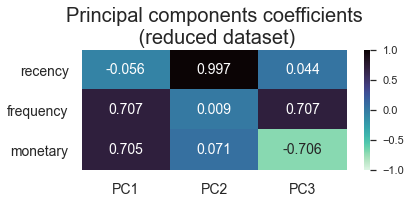

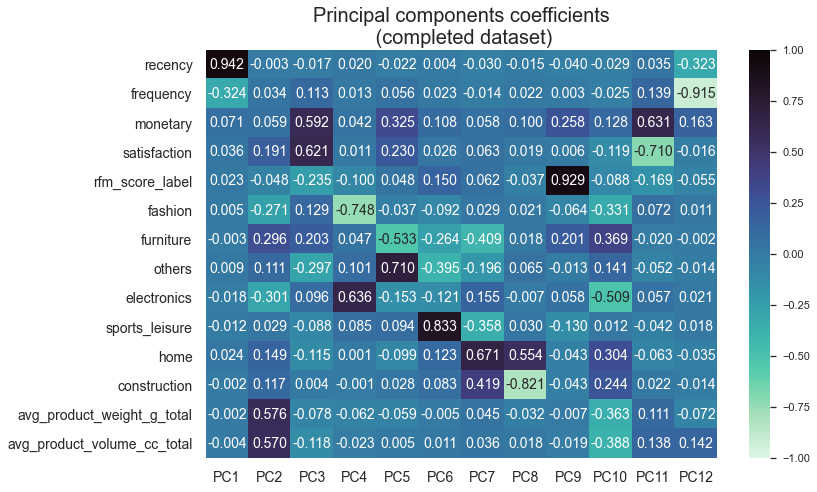

In [14]:
for key, value in DICTIONARY_DFS.items():
    
    if key == "reduced":
        plt.figure(figsize=(6,3))
    else:
        plt.figure(figsize=(12, 7))
        
    plt.title("Principal components coefficients\n (" + key + " dataset)", size=20)
    
    ax = sns.heatmap(globals()["df_pca_" + key], vmin=-1, vmax=1, center=0, cmap="mako_r",
                    annot=True, annot_kws={"size": 14}, fmt=".3f")

    plt.xticks(size=14)
    plt.yticks(rotation=0, size=14)
    plt.tight_layout()
    plt.savefig("images/principal-components-coefficients-" + key + ".png")
    plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>Recency and Frequency have a relation with PC1. At the same time, frequency has a strong positive relation with PC4</li>
        <li><b>Dataset completed: </b>We can see how category are distributed among the differents components</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.2. Scree of eigenvalues</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Scree of eigenvalues</b>
</div>

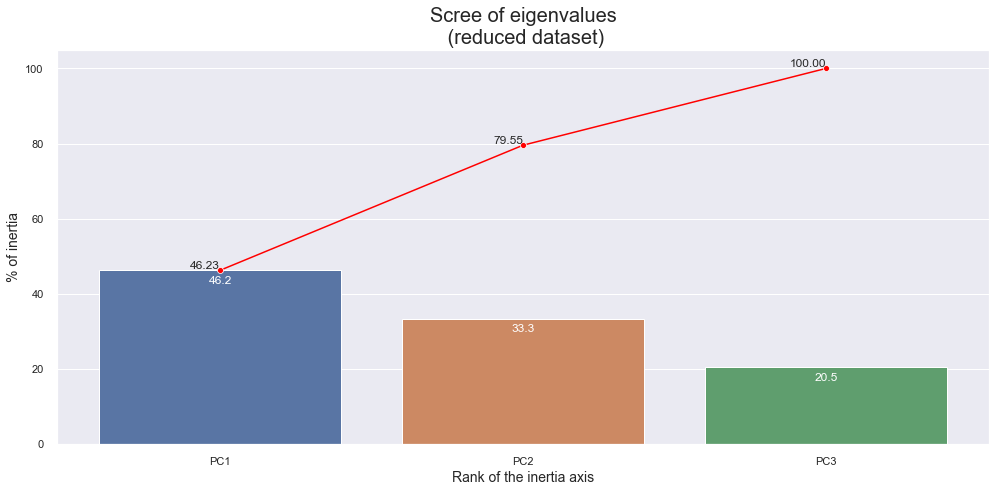

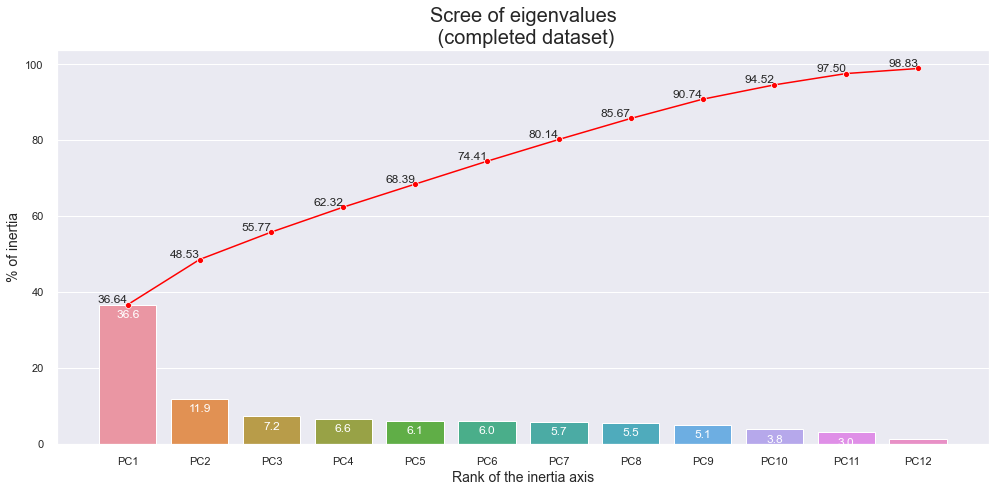

In [15]:
for key, value in DICTIONARY_DFS.items():
    
    scree = globals()["pca_" + key].explained_variance_ratio_*100

    fig = plt.subplots(figsize=(14, 7))
    plot_bar = sns.barplot(x=globals()["df_pca_" + key].columns, y=scree)
    for p in plot_bar.patches:
        plot_bar.annotate(format(p.get_height(), ".1f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha="center", va="bottom", xytext=(0, -15), textcoords="offset points", color="white")
    plot_line = sns.lineplot(x=globals()["df_pca_" + key].columns, y=scree.cumsum(), marker="o", color="red")

    for x, y in zip(globals()["df_pca_" + key].columns, scree.cumsum()):
        plot_line.text(x, y, "{:.2f}".format(y), ha="right", va="bottom")

    plt.xlabel("Rank of the inertia axis", size=14)
    plt.ylabel("% of inertia", size=14)
    plt.title("Scree of eigenvalues\n (" + key + " dataset)", size=20)
    plt.tight_layout()
    plt.savefig("images/scree-of-eigenvalues-" + key + ".png")
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: disc;">
        <li><b>Dataset reduced: </b>PC4 has the 97.49% of the data variance. The reduction was only for 1 features</li>
        <li><b>Dataset completed: </b>PC10 has the 93.79% of the data variance. The reduction was for 4 features</li>
    </ul> 
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.3. Correlation Circle</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b> for <b>dataset reduced</b>
</div>

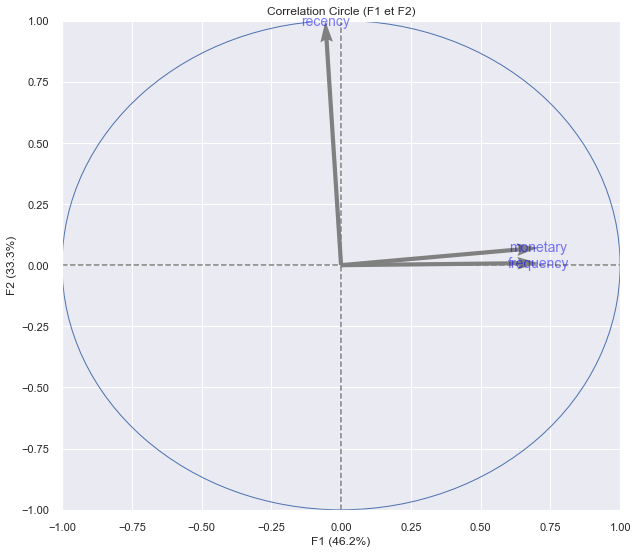

In [16]:
display_circles(pca_reduced.components_, n_comp_reduced, pca_reduced, [(0,1),(2,3),(4,5)], labels=np.array(features_reduced))

<div class="alert alert-block alert-info">
    Plotting the <b>Correlation Circle</b> for <b>dataset completed</b>
</div>

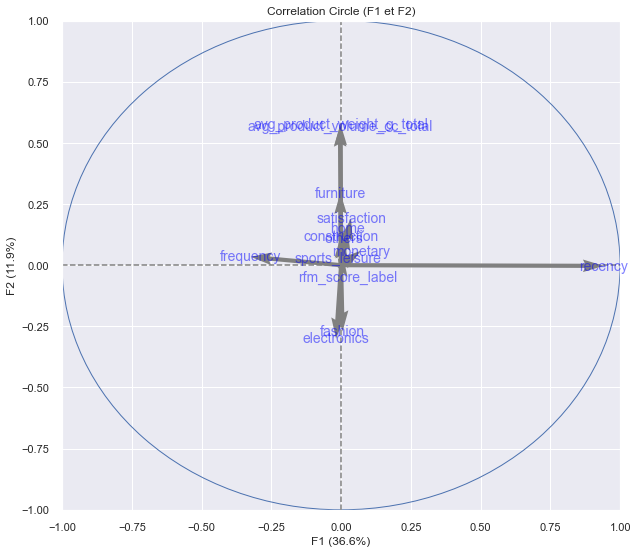

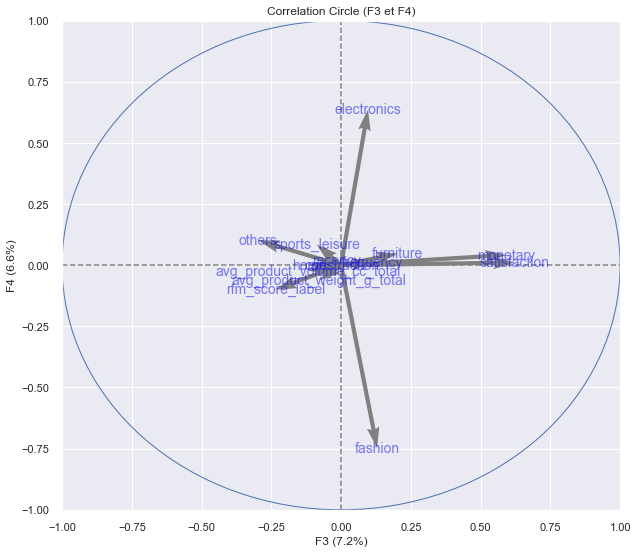

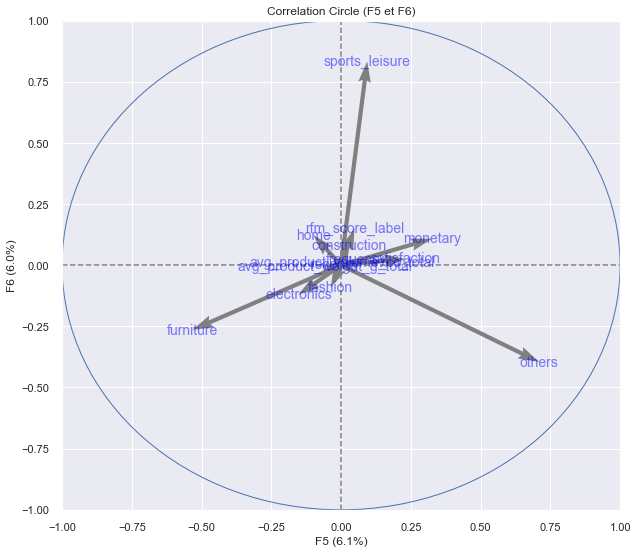

In [17]:
display_circles(pca_completed.components_, n_comp_completed, pca_completed, [(0,1),(2,3),(4,5)], labels=np.array(features_completed))

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.4. Projection of individuals</h4>
</div>

<div class="alert alert-block alert-info">
    Plotting the <b>Projection of individuals</b>
</div>

In [18]:
for key, value in DICTIONARY_DFS.items():
    
    globals()["X_projected_" + key] = globals()["pca_" + key].transform(globals()["X_" + key])
    globals()["index_values_sample_" + key] = pd.Series(globals()["index_values_" + key]).sample(10000)

<div class="alert alert-block alert-info">
    Plotting the Projection of individuals for <b>dataset reduced</b></b>
</div>

In [19]:
display_factorial_planes(X_projected_reduced, n_comp_reduced, pca_reduced, [(0,1),(2,3),(4,5)], 
                         labels=np.array(index_values_sample_reduced), 
                         illus_var=data_reduced.loc[index_values_sample_reduced, "rfm_score_label"], 
                         lab_on=False, alpha = 0.5)

KeyError: 'rfm_score_label'

<div class="alert alert-block alert-info">
    Plotting the Projection of individuals for <b>dataset completed</b></b>
</div>

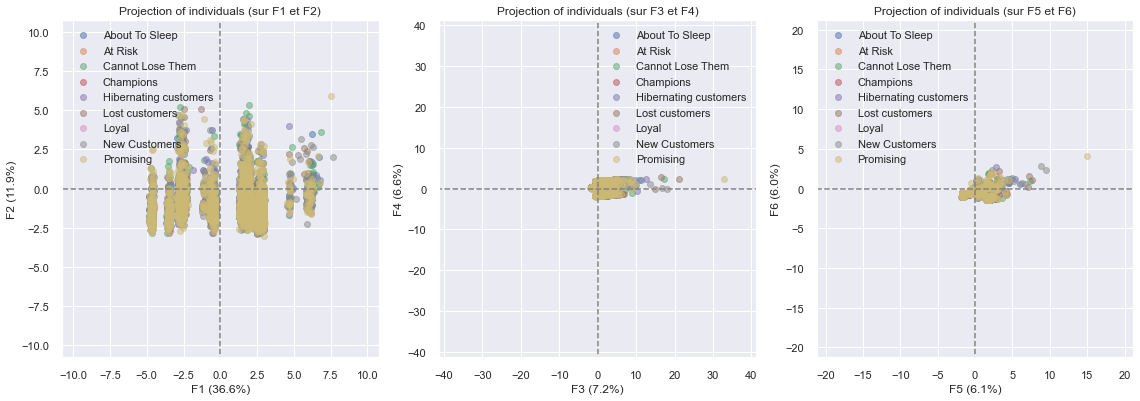

In [20]:
display_factorial_planes(X_projected_completed, n_comp_completed, pca_completed, [(0,1),(2,3),(4,5)], 
                         labels=np.array(index_values_sample_completed), 
                         illus_var=data_completed.loc[index_values_sample_completed, "rfm_score_label"], 
                         lab_on=False, alpha=0.5)

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2.5. Variance of the components</h4>
</div>

<div class="alert alert-block alert-info">
    Keeping the <b>90% of the variance of the components</b>
</div>

In [21]:
var_threshold=0.90

for key, value in DICTIONARY_DFS.items():
    
    # Processing the PCA
    globals()["pca_" + key] = decomposition.PCA()
    globals()["pca_" + key].fit(globals()["X_" + key])
    
    # Getting the explained variance ratio for each principal component
    globals()["scree_" + key] = globals()["pca_" + key].explained_variance_ratio_
    
    # Getting the number of principal components to reach variance thresholds
    globals()["mask_" + key] = globals()["scree_" + key].cumsum() > var_threshold
    globals()["nb_selected_components_" + key] = len(globals()["scree_" + key][~globals()["mask_" + key]]) + 1
    
    # Compute and displays the actual ratio of explained variance
    globals()["explained_variance_sum_" + key] = globals()["scree_" + key].cumsum()[globals()["nb_selected_components_" + key]-1]

    # Getting the projection of the data on the first components
    globals()["X_PCA_" + key] = globals()["pca_" + key].transform(globals()["X_" + key])[:,:globals()["nb_selected_components_" + key]]

    print("-- Dataset " + key + " components --")
    print("Number of selected components:", globals()["nb_selected_components_" + key])
    print("Cumulative explained variance:  {:.2f}%".format(globals()["explained_variance_sum_" + key]*100))
    print("\n")
    
    COL_TO_PC =  ["PC" + str(i + 1) for i in range(globals()["nb_selected_components_" + key])]
    globals()["df_pca_" + key] = pd.DataFrame(data=globals()["X_PCA_" + key], columns=COL_TO_PC, index=globals()["index_values_" + key])

-- Dataset reduced components --
Number of selected components: 3
Cumulative explained variance:  100.00%


-- Dataset completed components --
Number of selected components: 9
Cumulative explained variance:  90.74%




In [22]:
df_pca_reduced.head()

,PC1,PC2,PC3
0,-0.443012,-1.780853,0.260729
1,-0.294218,-1.754570,0.111703
2,-0.597885,-1.739992,0.415001
3,0.077708,-1.649342,-0.261288
4,-0.113744,-1.668630,-0.069717


In [23]:
df_pca_reduced.shape

(66934, 3)

In [24]:
df_pca_completed.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.000482,-0.468618,-1.630123,0.332144,1.701482,-1.006084,-0.612532,0.080611,0.453693
1,3.007922,-0.763101,-1.408105,0.330167,1.717587,-1.014067,-0.616263,0.050438,0.471797
2,2.980457,-1.227825,-1.594318,0.347209,1.627456,-1.029369,-0.669310,0.038184,0.480041
3,2.049814,2.106370,-1.521854,0.110182,1.732281,-0.988195,-0.358208,0.040790,0.455471
4,2.051742,-0.373698,-1.280778,0.292110,1.792445,-1.006710,-0.547943,0.071728,0.505608


In [25]:
df_pca_completed.shape

(66934, 9)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. K-Means</h2>
</div>

In [26]:
DICTIONARY_DFS["pca_reduced"] = df_pca_reduced
DICTIONARY_DFS["pca_completed"] = df_pca_completed

In [27]:
DICTIONARY_DFS = {
    
    "reduced" : data_reduced,
    "completed" : data_completed    
        "reduced" : data_reduced,
    "completed" : data_completed    
}

SyntaxError: invalid syntax (<ipython-input-27-06f1109fbd55>, line 5)

In [ ]:
CCCCC

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Number of Cluster</h3>
</div>

In [ ]:
DICTIONARY_DFS = {
    "reduced" : data_reduced,
    "completed" : data_completed    
}

In [ ]:
sample_scaled_reduced

In [ ]:
sample_scaled_completed

In [ ]:
example = globals()["sample_scaled_" + key] = preprocessor.fit_transform(value)

In [ ]:
data_reduced

In [ ]:
example = preprocessor.fit_transform(data_reduced)

In [ ]:
data_reduced

In [ ]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=K)
    km = km.fit(df_pca_reduced.values)
    sum_of_squared_distances.append(km.inertia_)

In [ ]:
df_pca_completed

In [ ]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(df_pca_completed.values).score(df_pca_completed.values) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
model = KMeans()

    
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(sample_scaled_completed)
visualizer.show()


In [ ]:
model = KMeans()

    
visualizer = KElbowVisualizer(model, k=(2, 50), timings=False)
visualizer.fit(sample_scaled_reduced)
visualizer.show()


<div class="alert alert-block alert-info">
    Now, we are going to select the number of cluster through the <b>Elbow Method</b>
</div>

In [ ]:
model = KMeans()

for key, value in DICTIONARY_DFS.items():
    
    print("\n-- Dataset " + key + " --\n")
    
    visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
    visualizer.fit(globals()["df_pca_" + key])
    visualizer.show()
    
    print("\n")

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Now, we got the cluster for each dataset</p>
</div>

In [ ]:
# Fitting KMeans
km = KMeans(n_clusters=4, random_state=42)

# Prediction
label = km.fit_predict(df_pca_reduced.value)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_pca_reduced[label==i, 0], df_pca_reduced[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:
# Fitting KMeans
km = KMeans(init='random', n_clusters=5, random_state=42,  n_init=10)

In [ ]:
km.fit(df_pca_reduced)
clusters = km.predict(df_pca_reduced)

In [ ]:
pca_reduced = PCA(n_components=3)
pca_reduced.fit(df_pca_reduced)

In [ ]:
X_reduced = pca_reduced.transform(df_pca_reduced)

In [ ]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=df_pca_reduced.index, columns=['PC1','PC2', "PC3"])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

In [ ]:
centres_reduced = pca_reduced.transform(km.cluster_centers_)

In [ ]:
display_factorial_planesXXX(X_reduced, 2, pca_reduced, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

In [ ]:
def display_factorial_planesXXX(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

In [ ]:
data_reduced.index

In [ ]:
# Fitting KMeans
km = KMeans(n_clusters=5, random_state=42)

# Prediction
label = km.fit_predict(df_pca_reduced)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_pca_reduced.iloc[label==i, 0], df_pca_reduced.iloc[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

In [ ]:
# Fitting KMeans
km = KMeans(n_clusters=6, random_state=42)

# Prediction
label = km.fit_predict(df_pca_completed)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_pca_completed.iloc[label==i, 0], df_pca_completed.iloc[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

In [ ]:
CCCCCCCCCCCC

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(df_worked)
visualizer.show()

In [ ]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(df_worked).score(df_worked) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-info">
    First of all, we are going to work on deafult mode for the model
</div>

In [ ]:
model = KMeans(init="random", n_clusters="4", n_init=10)

In [ ]:
label  = model.fit_predict(df_data_PCA)

In [ ]:
# centroids = model.cluster_centers_
u_labels = np.unique(label)

In [ ]:
# Graphical representation
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df_data_PCA.iloc[label==i, 0], df_data_PCA.iloc[label==i, 1], label = i)
plt.scatter(centroids[:, 0], centroids[:,1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. K-means</h3>
</div>

<div class="alert alert-block alert-info">
    First of all, we are going to work on deafult mode for the model
</div>

In [ ]:
https://www.scikit-yb.org/en/latest/

https://www.youtube.com/watch?v=4b5d3muPQmA
- forma
    -- centroide??
        -- homogeneidad
        -- Separacion de cluster -- SKL=
         union --> index davies bouldin
         silhouette -> escoger la cantidad de cluster y ver la estabilidad
- estabilidad
- coherencia


- ARI, pour Adjusted Rand Index

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
https://www.youtube.com/watch?v=EItlUEPCIzM
https://datascientest.com/algorithme-des-k-means.
https://realpython.com/k-means-clustering-python/

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

In [ ]:
raise SystemExit("Stop right there!")

<div class="alert alert-block alert-danger">
    <p><b>Flag position</b></p>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">------------------------------------------</h1>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Optimization</h3>
</div>

<div class="alert alert-block alert-info">
    List of models to use. for now, in default mode
</div>

- Clustering hiérarchique
- k-means
- DBScan

https://www.definitions-marketing.com/definition/segmentation-rfm/<br>
https://lms.simplilearn.com/courses/4414/Introduction-to-Supervised-&-Unsupervised-Machine-Learning/syllabus<br>

https://classroom.udacity.com/courses/st101<br>
https://classroom.udacity.com/courses/ud827<br>
https://www.freecodecamp.org/news/free-machine-learning-course-10-hourse/<br>

https://towardsdatascience.com/10-highly-probable-data-scientist-interview-questions-fd83f7414760<br>